In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import dataset

In [2]:
df = pd.read_csv('drinkMenu.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

#### change datatype

In [4]:
df[' Total Fat (g)'] .unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [5]:
df[' Total Fat (g)'] = pd.to_numeric(df[' Total Fat (g)'],errors='coerce')
df[' Total Fat (g)'] .fillna(value=3.2,inplace=True)


### 2. Data preparation
-Fill null values<br>
-Remove duplicates<br>
-Drop unnecessary Columns

In [6]:
df['Caffeine (mg)']= df['Caffeine (mg)'].str.lower()
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'varies', '50', '70', '120',
       '55', '80', '110', '165', '235', '90', nan, '125', '170', '15',
       '130', '140', '100', '145', '65', '105'], dtype=object)

In [7]:
df[df['Caffeine (mg)'].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [8]:
df[df['Beverage'] =='Iced Brewed Coffee (With Milk & Classic Syrup)']['Caffeine (mg)']

157     90
158    NaN
159     90
160     90
161    125
162    125
163    125
164    170
165    170
Name: Caffeine (mg), dtype: object

In [9]:
df['Caffeine (mg)'].fillna(value=90 ,inplace=True)

In [10]:
# check duplicate values
df.duplicated().sum()
# df.drop_duplicates()

0

In [11]:
# un necessary Columns
df.drop(columns = ['Beverage_category'], inplace=True)


### 3. Data Visualisations: Using plots to answers this questions
    -Q1. Which drink has the highest calories from the dataset?<br>
    -Q2. Highest Sugar Drink ?

<AxesSubplot:xlabel='Beverage', ylabel='Calories'>

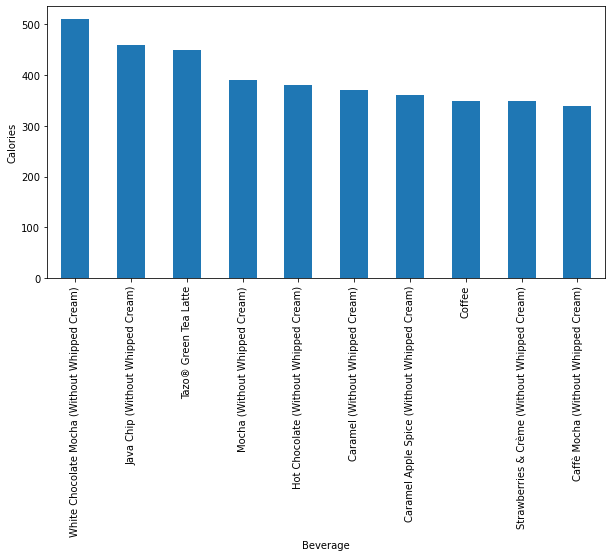

In [13]:
plt.figure(figsize = (10, 5))

highestCAL=df.groupby('Beverage')['Calories'].max().sort_values(ascending=False)[:10]

highestCAL.plot.bar(x=highestCAL.index , xlabel='Beverage', y=highestCAL.values , ylabel='Calories')

In [14]:
HighestSuger=df[df[' Sugars (g)'] == df[' Sugars (g)'].max()]
HighestSuger

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145


[Text(0, 0, 'Java Chip (Without Whipped Cream)Venti Nonfat Milk'),
 Text(1, 0, 'Java Chip (Without Whipped Cream)Whole Milk')]

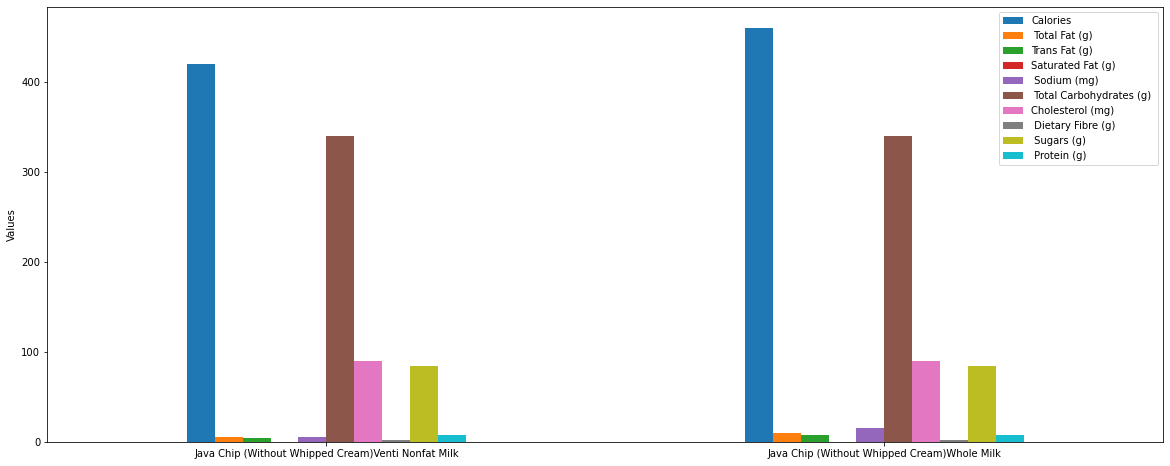

In [15]:
bins=['Java Chip (Without Whipped Cream)Venti Nonfat Milk','Java Chip (Without Whipped Cream)Whole Milk']
ax=HighestSuger.plot(kind='bar',ylabel='Values',figsize=(20, 8))
ax.set_xticklabels(bins,rotation ='horizontal')
